# Income Predictor

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Train.csv')

In [3]:
df.shape

(209499, 43)

In [4]:
df.sample(10)

,ID,age,gender,education,class,education_institute,marital_status,race,is_hispanic,employment_commitment,...,country_of_birth_mother,migration_code_change_in_msa,migration_prev_sunbelt,migration_code_move_within_reg,migration_code_change_in_reg,residence_1_year_ago,old_residence_reg,old_residence_state,importance_of_record,income_above_limit
187736,ID_TZ80215,53,Female,High school graduate,Private,NaN,Married-civilian spouse present,White,All other,Full-time schedules,...,US,?,?,?,?,NaN,NaN,NaN,1014.50,Below limit
39131,ID_TZ134351,22,Male,10th grade,Private,NaN,Divorced,White,Mexican-American,Children or Armed Forces,...,US,MSA to MSA,Same,Same county,Same county,No,South,Utah,2267.37,Below limit
83597,ID_TZ174410,44,Female,Bachelors degree(BA AB BS),Private,NaN,Married-spouse absent,White,All other,Children or Armed Forces,...,US,MSA to nonMSA,No,Different county same state,Different county same state,No,Midwest,Mississippi,2681.36,Below limit
47173,ID_TZ141597,29,Male,Bachelors degree(BA AB BS),NaN,NaN,Never married,Black,All other,Children or Armed Forces,...,US,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,576.21,Below limit
1567,ID_TZ10051,3,Male,Children,NaN,NaN,Never married,Amer Indian Aleut or Eskimo,All other,Children or Armed Forces,...,US,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,493.86,Below limit
146672,ID_TZ42884,82,Female,10th grade,NaN,NaN,Widowed,Amer Indian Aleut or Eskimo,All other,Not in labor force,...,US,?,?,?,?,NaN,NaN,NaN,771.82,Below limit
201567,ID_TZ92789,42,Male,Associates degree-occup /vocational,Self-employed-not incorporated,NaN,Never married,White,All other,Full-time schedules,...,US,?,?,?,?,NaN,NaN,NaN,2734.75,Below limit
155198,ID_TZ50635,36,Female,Bachelors degree(BA AB BS),Local government,NaN,Divorced,White,Mexican-American,Children or Armed Forces,...,Honduras,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,1933.98,Below limit
149347,ID_TZ45316,19,Female,Some college but no degree,Private,College or university,Never married,White,All other,PT for econ reasons usually FT,...,US,?,?,?,?,NaN,NaN,NaN,1893.14,Below limit
186651,ID_TZ79229,21,Male,High school graduate,Private,NaN,Never married,White,All other,Children or Armed Forces,...,US,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,2709.55,Below limit


In [5]:
#here we get to know what kind of datatype our colum have
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209499 entries, 0 to 209498
Data columns (total 43 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   ID                              209499 non-null  object 
 1   age                             209499 non-null  int64  
 2   gender                          209499 non-null  object 
 3   education                       209499 non-null  object 
 4   class                           104254 non-null  object 
 5   education_institute             13302 non-null   object 
 6   marital_status                  209499 non-null  object 
 7   race                            209499 non-null  object 
 8   is_hispanic                     209499 non-null  object 
 9   employment_commitment           209499 non-null  object 
 10  unemployment_reason             6520 non-null    object 
 11  employment_stat                 209499 non-null  int64  
 12  wage_per_hour   

In [6]:
#lets see the no of null values so that we can treat it 
df.isnull().sum()

ID                                     0
age                                    0
gender                                 0
education                              0
class                             105245
education_institute               196197
marital_status                         0
race                                   0
is_hispanic                            0
employment_commitment                  0
unemployment_reason               202979
employment_stat                        0
wage_per_hour                          0
is_labor_union                    189420
working_week_per_year                  0
industry_code                          0
industry_code_main                     0
occupation_code                        0
occupation_code_main              105694
total_employed                         0
household_stat                         0
household_summary                      0
under_18_family                   151654
veterans_admin_questionnaire      207415
vet_benefit     

## Lets treat our null values
If the colums having null values are not too important we will drop them

In [7]:
cols=['occupation_code_main','under_18_family','veterans_admin_questionnaire','migration_code_change_in_msa','migration_prev_sunbelt','migration_code_move_within_reg','migration_code_change_in_reg','residence_1_year_ago','old_residence_state','old_residence_reg',"education_institute",'unemployment_reason',"class","is_labor_union"]
df=df.drop(columns=cols)

In [8]:
## After treating the null values let'look into it
df.isnull().sum()

ID                         0
age                        0
gender                     0
education                  0
marital_status             0
race                       0
is_hispanic                0
employment_commitment      0
employment_stat            0
wage_per_hour              0
working_week_per_year      0
industry_code              0
industry_code_main         0
occupation_code            0
total_employed             0
household_stat             0
household_summary          0
vet_benefit                0
tax_status                 0
gains                      0
losses                     0
stocks_status              0
citizenship                0
mig_year                   0
country_of_birth_own       0
country_of_birth_father    0
country_of_birth_mother    0
importance_of_record       0
income_above_limit         0
dtype: int64

In [9]:
df.head()

,ID,age,gender,education,marital_status,race,is_hispanic,employment_commitment,employment_stat,wage_per_hour,...,gains,losses,stocks_status,citizenship,mig_year,country_of_birth_own,country_of_birth_father,country_of_birth_mother,importance_of_record,income_above_limit
0,ID_TZ0000,79,Female,High school graduate,Widowed,White,All other,Not in labor force,0,0,...,0,0,292,Native,95,US,US,US,1779.74,Below limit
1,ID_TZ0001,65,Female,High school graduate,Widowed,White,All other,Children or Armed Forces,0,0,...,0,0,0,Native,94,US,US,US,2366.75,Below limit
2,ID_TZ0002,21,Male,12th grade no diploma,Never married,Black,All other,Children or Armed Forces,0,500,...,0,0,0,Native,94,US,US,US,1693.42,Below limit
3,ID_TZ0003,2,Female,Children,Never married,Asian or Pacific Islander,All other,Children or Armed Forces,0,0,...,0,0,0,Native,94,US,India,India,1380.27,Below limit
4,ID_TZ0004,70,Male,High school graduate,Married-civilian spouse present,White,All other,Not in labor force,0,0,...,0,0,0,Native,95,US,US,US,1580.79,Below limit


# EDA (Lets plot some graphs for the data we have)

In [10]:
df.race.value_counts()

race
 White                          175709
 Black                           21394
 Asian or Pacific Islander        6056
 Other                            3927
 Amer Indian Aleut or Eskimo      2413
Name: count, dtype: int64

<Axes: ylabel='count'>

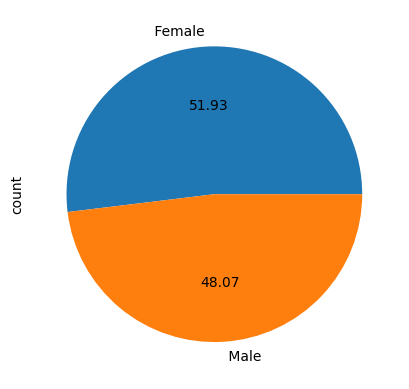

In [11]:

# x=df['gender'].value_counts()
# plt.pie(x,autopct="%.2f")
# plt.title("gender variable count")
df.gender.value_counts().plot(kind='pie',autopct="%.2f")

<Axes: ylabel='count'>

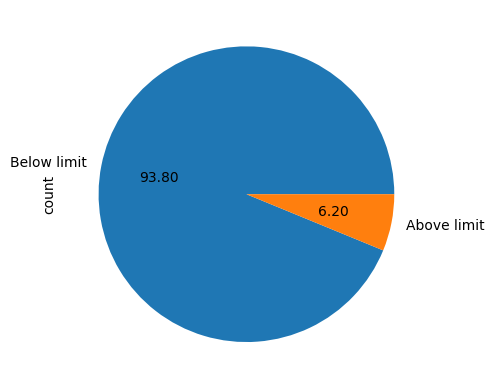

In [12]:
df.income_above_limit.value_counts().plot(kind='pie',autopct='%.2f')

<Axes: ylabel='count'>

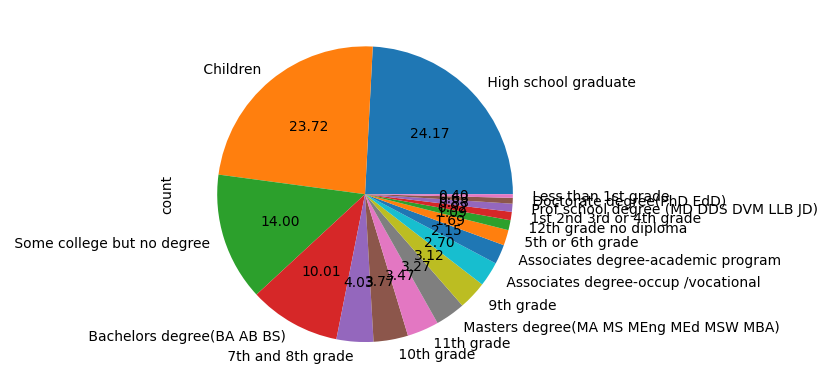

In [13]:
df.education.value_counts().plot(kind='pie',autopct="%.2f")

<Axes: xlabel='income_above_limit', ylabel='gains'>

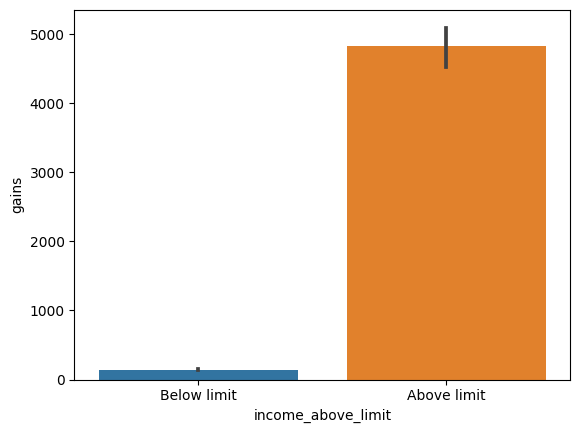

In [14]:
sns.barplot(y=df.gains,x=df.income_above_limit)

<Axes: xlabel='income_above_limit', ylabel='working_week_per_year'>

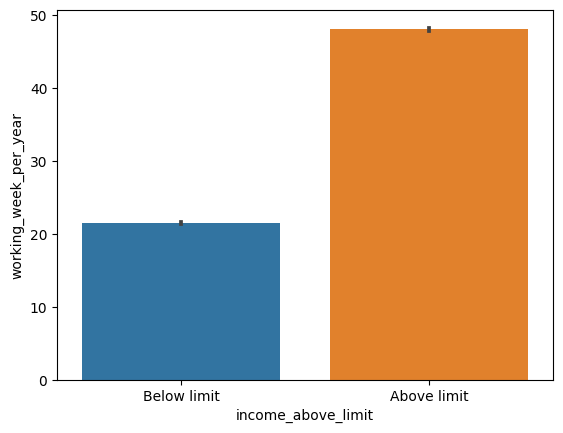

In [15]:
sns.barplot(y=df.working_week_per_year,x=df.income_above_limit)

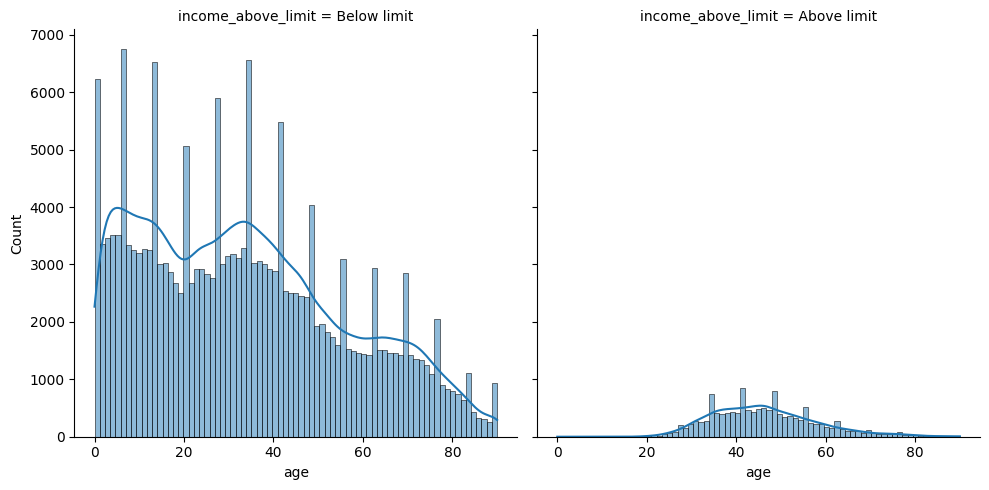

In [16]:
g = sns.displot(df, col='income_above_limit', x="age", kde=True)
plt.show()

# Transforming the catagorical colums variable we get

In [17]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
encoder.fit(df.income_above_limit)
df.income_above_limit=encoder.transform(df.income_above_limit)

In [18]:
df['gender'] = df['gender'].str.strip().replace({'Male': 1, 'Female': 0})


# checking for co-relation

In [19]:
df_corr=df.corr

In [20]:
df.gender

0         0
1         0
2         1
3         0
4         1
         ..
209494    0
209495    1
209496    0
209497    0
209498    1
Name: gender, Length: 209499, dtype: int64

In [21]:
df_corr=df.corr

# Feature Selection for training the model 

In [24]:

columns_to_drop = [
    'ID',
    'employment_stat',
    'occupation_code',
    'mig_year',
    'importance_of_record',
    'education',
    'marital_status',
    'race',
    'is_hispanic',
    'employment_commitment',
    'industry_code_main',
    'household_stat',
    'household_summary',
    'tax_status',
    'citizenship',
    'country_of_birth_own',
    'country_of_birth_father',
    'country_of_birth_mother',
    'working_week_per_year',
    'industry_code',
    'vet_benefit'
      
]

df = df.drop(columns=columns_to_drop)

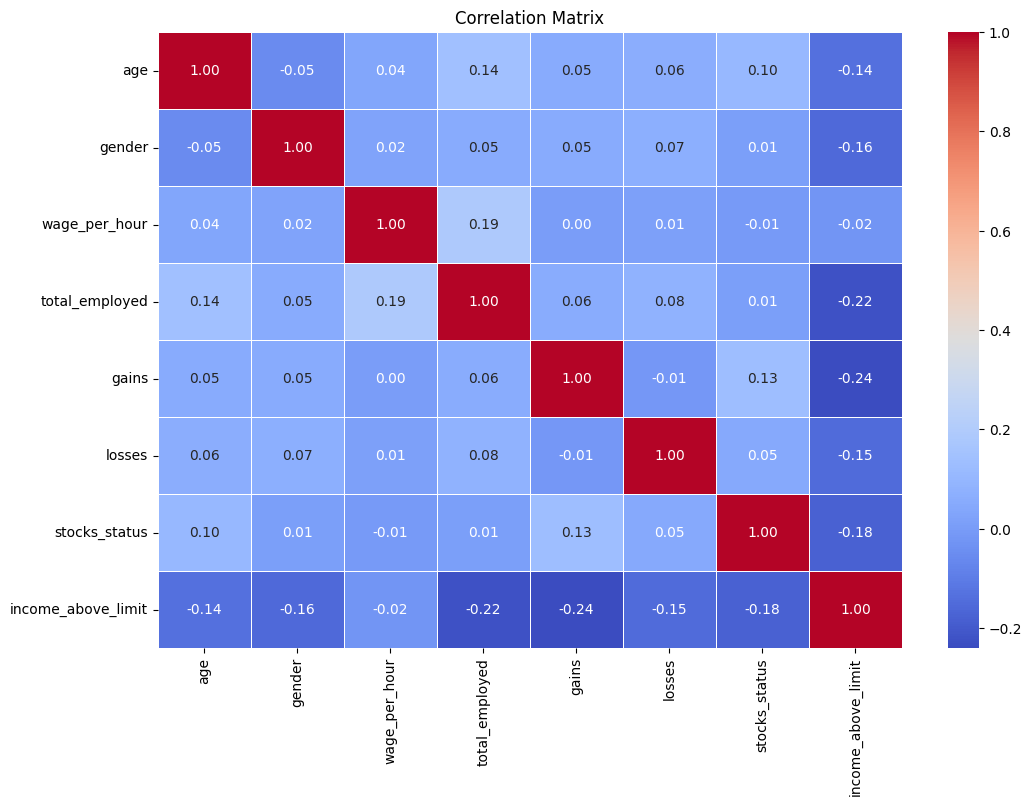

In [25]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

In [26]:
df.head()

,age,gender,wage_per_hour,total_employed,gains,losses,stocks_status,income_above_limit
0,79,0,0,2,0,0,292,1
1,65,0,0,0,0,0,0,1
2,21,1,500,4,0,0,0,1
3,2,0,0,0,0,0,0,1
4,70,1,0,0,0,0,0,1


In [27]:
test_df = pd.read_csv('test.csv',usecols=['age','gender','wage_per_hour','total_employed','gains','losses','stocks_status'])
test_df['gender'] = test_df['gender'].str.strip().replace({'Male': 1, 'Female': 0})
test_df.head()

,age,gender,wage_per_hour,total_employed,gains,losses,stocks_status
0,54,1,600,2,0,0,0
1,53,1,0,4,0,0,0
2,42,1,0,5,15024,0,500
3,16,0,0,6,0,0,0
4,16,1,0,0,0,0,0


# Root Mean Square Error

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import accuracy_score
X=df.drop(columns='income_above_limit',axis=1)
Y=df['income_above_limit']

X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
model=RandomForestClassifier()
model.fit(X_train,y_train)
prediction=model.predict(X_test)
# Calculate RMSE (Root Mean Squared Error)
rmse=sqrt(mean_squared_error(y_test,prediction))
accuracy=accuracy_score(y_test,prediction)
print(f"RMSE Score: {rmse}")

RMSE Score: 0.2312671331458674


# Accuracy Score

In [29]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,prediction)
print(f"Accuracy Score: {accuracy}")

Accuracy Score: 0.9465155131264916


# F1 Score

In [30]:
from sklearn.metrics import f1_score
score=f1_score(y_test,prediction)
print(f"F1 Score: {score}")

F1 Score: 0.9719162374525359


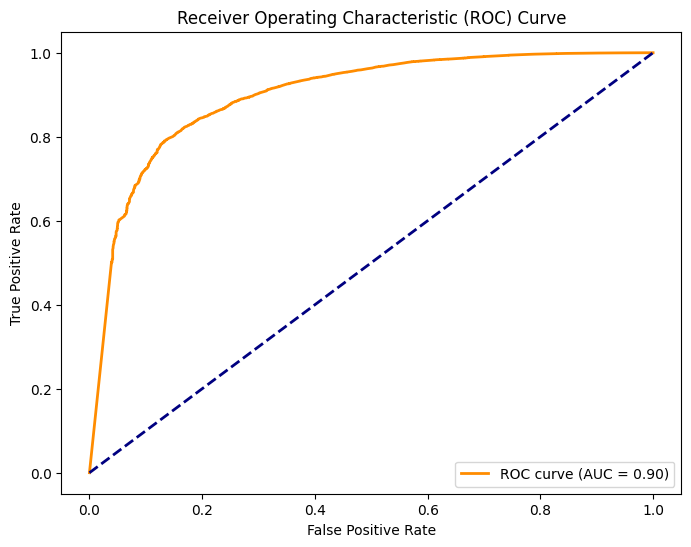

In [31]:
from sklearn.metrics import roc_curve, auc

# Assuming 'model' is already trained and 'X_test', 'y_test' are defined
y_score = model.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

